In [1]:
name = "Yicheng CHEN"
date_returned = "14 Apr 2025"

# Lab 8 Numerical integration
Hardware 2 course - Mathematics and Physics<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

## Setup

Read necessary libraries and functions.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# These are used for validation
from scipy.integrate import trapezoid, cumulative_trapezoid


## Problem 1

Write your own function that integrates along the given axis using the composite trapezoidal rule. The function should take two input parameters:
- `y` is the input array to integrate
- `x` is the array containing the sample points correspondings to the `y` values.

Test the function with the following test codes:
```
>>> A1 = my_trapezoid([1, 2, 3])
>>> print(f'A1 = {A:+7.4f}')
A1 = +4.0000

>>> A2 = my_trapezoid([1, 2, 3], [4, 6, 8])
>>> print(f'A2 = {A2:+7.4f}')
A2 = +8.0000

>>> A3 = my_trapezoid([1, 2, 3], [8, 6, 4])
>>> print(f'A3 = {A3:+7.4f}')
A3 = -8.0000

>>> x = np.linspace(0, 1, num=50)
>>> y = x**2
>>> A4 = my_trapezoid(y, x)
>>> print(f'A4 = {A4:+7.4f}')
A4 = +0.3334
```

In [71]:
# My trapezoid
def my_trapezoid(y, x = None):
    if x is None:
        x = np.arange(len(y))

    
    res = [(x[i+1]-x[i])*(y[i+1]+y[i])/2 for i in range(len(y)-1)]
    res = sum(res)
    
    return res


# Your test codes come here

A1 = my_trapezoid([1, 2, 3])
print(f'A1 = {A1:+7.4f}')

A2 = my_trapezoid([1, 2, 3], [4, 6, 8])
print(f'A2 = {A2:+7.4f}')

A3 = my_trapezoid([1, 2, 3], [8, 6, 4])
print(f'A3 = {A3:+7.4f}')

x = np.linspace(0, 1, num=50)
y = x**2
A4 = my_trapezoid(y, x)
print(f'A4 = {A4:+7.4f}')

A1 = +4.0000
A2 = +8.0000
A3 = -8.0000
A4 = +0.3334


## Problem 2

Calculate the value of the following *definite integrals* using **your code** for the *composite trapezoidal numerical integration*. Use $N = 50$ subdivisions. Print out the results with 4 decimals accuracy.

a) $S_1 = \int_0^5 \left( x^2 + 2x \right) dx$

b) $S_2 = \int_0^\pi sin(x) dx$

Verify your results by using `scipy.integrate.trapezoid` function.

In [72]:
# a)
def f1(x):
    return x**2 + 2*x

x = np.linspace(0, 5, 50)
y = f1(x)

S1 = my_trapezoid(y, x)
S1_scipy = trapezoid(y, x)

print(f'S1 = {S1:+7.4f}')
print(f'S1_scipy = {S1_scipy:+7.4f}', "check")


S1 = +66.6753
S1_scipy = +66.6753 check


In [73]:
# b)
def f2(x):
    return np.sin(x)

x = np.linspace(0, np.pi, 50)
y = f2(x)

S2 = my_trapezoid(y, x)
S2_scipy = trapezoid(y, x)

print(f'S2 = {S2:+7.4f}')
print(f'S2_scipy = {S2_scipy:+7.4f}', "check")


S2 = +1.9993
S2_scipy = +1.9993 check


## Problem 3

Write **your own code** for calculating the cumulative integrate of $y(x)$ using the composite trapezoid rule.

 The function should take two input parameters:
- `y` is the input array to integrate
- `x` is the array containing the sample points correspondings to the `y` values.

Test the function with the following code:
```
>>> x = np.linspace(-2, 2, num=20)
>>> y = x
>>> y_int = my_cumulative_trapezoid(y, x)
>>> plt.plot(x, y_int, 'b-')
>>> plt.grid()
>>> plt.show()
```

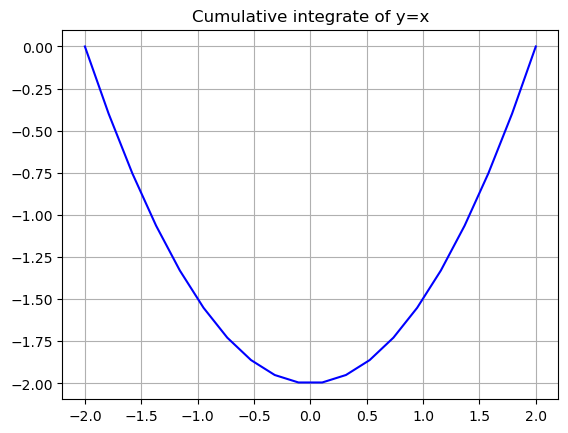

In [66]:
# Your results should look like this

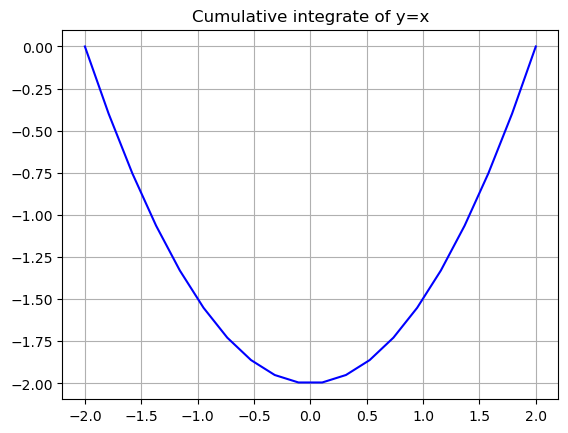

In [67]:
def my_cumulative_trapezoid(y, x):
    #y_int = np.zeros_like(y)
    dy = np.diff(y)
    dx = np.diff(x)
    
    area = (y[:-1] + y[1:]) * dx / 2
    y_int = np.concatenate(([0], np.cumsum(area)))
    return y_int

x = np.linspace(-2, 2, num=20)
y = x
y_int = my_cumulative_trapezoid(y, x)
plt.plot(x, y_int, 'b-')
plt.title('Cumulative integrate of y=x')
plt.grid()
plt.show()


## Problem 4

Calculate the instantaneous position $p(t_n) =\int_0^{t_n} v(t) dt$ by numerically integrating using **your code for cumulative trapezoid**. 

The velocity is given by $v(t) = -0.5t^2 + 5t$

Use the time range $t \in [0, 10]$ and time step $t_s = 0.01$ in integration. 

Plot both the velocity and position.

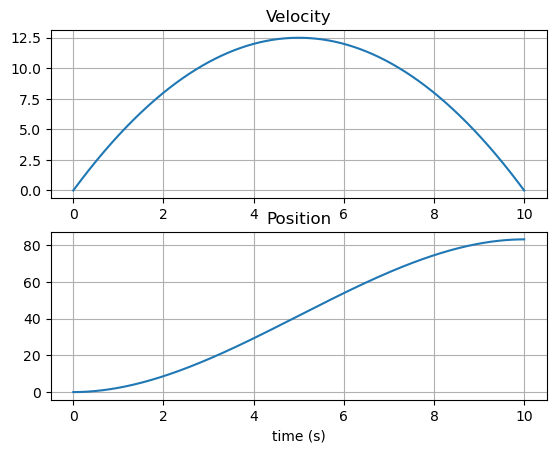

In [10]:
# Your results should look like this

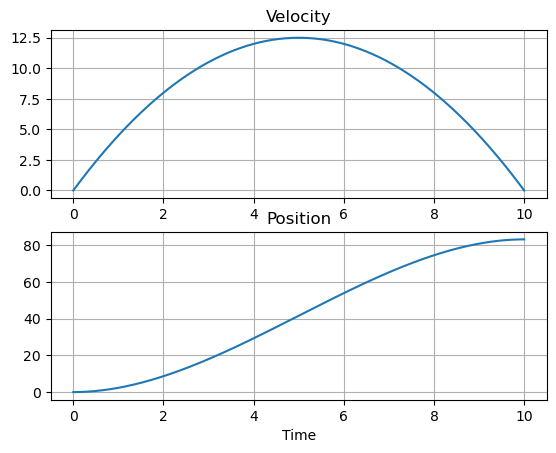

In [89]:
v_func = lambda t: -0.5 * t**2 + 5 * t


t = np.arange(0, 10 + 0.01, 0.01)

v = v_func(t)
s = my_cumulative_trapezoid(v, t)
#s = cumulative_trapezoid(v, t, initial=0)

fig, (ax1, ax2) = plt.subplots(2, 1)



ax1.plot(t, v)
ax1.set_title('Velocity')
ax1.grid()

ax2.plot(t, s)
ax2.set_title('Position')
ax2.set_xlabel('Time')
ax2.grid()
plt.show()
